In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

data = pd.read_csv('C:/Users/joao_/Desktop/4 ANO JOAO/SINO/VS CODE PROJETO/Jupyter Notebook/Data Transformation/bank-full-transformed.csv')

In [2]:
px.histogram(data, x="job", color="job") 

In [3]:
px.histogram(data, x="job", color="education", barmode = 'group') 

In [4]:
px.histogram(data, x="job", color="y", barmode = 'group') 

In [5]:
joby = pd.DataFrame(data.groupby('job')['y'].sum()).reset_index()
joby = joby.sort_values(by = 'y', ascending = False)
fig = px.bar(joby.iloc[:], 
             x = 'job', y = 'y', title = 'Distribuição de Subscrição com Profissão')

fig.show()

In [6]:
count_job_response_pct = pd.crosstab(data['y'],data['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()

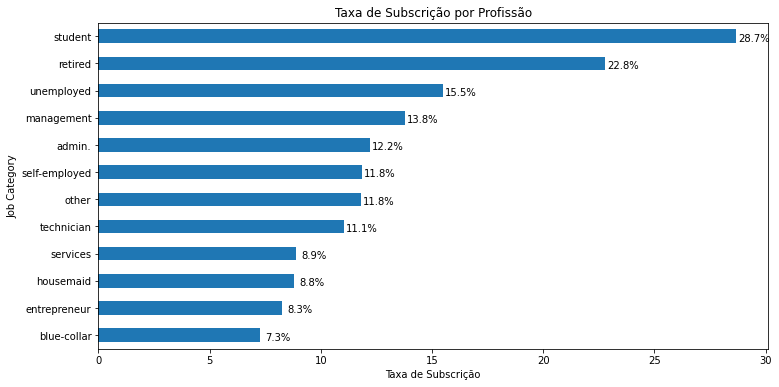

In [7]:
plot_job = count_job_response_pct[1].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))             
plt.title('Taxa de Subscrição por Profissão')
plt.xlabel('Taxa de Subscrição')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,count_job_response_pct[1].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8,rec.get_y()+ rec.get_height()-0.5,label+'%',ha = 'center',va='bottom')

In [8]:
labels = data['job'].value_counts().index
values = data['job'].value_counts().values

fig = px.pie(data, values= values, names= labels)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='show')
fig.show()

In [9]:
labels = data['job'].value_counts().index
values = data['job'].value_counts().values

fig = px.pie(data, values= values, names= labels)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='show')
fig.show()

In [10]:
labels = data['job'].value_counts().index
values = data['job'].value_counts().values

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial'
)])
fig.show()


data = px.data.tips()

app = dash.Dash(__name__)

app.layout = html.Div([
    html.P("x-axis:"),
    dcc.Checklist(
        id='x-axis', 
        options=[{'value': x, 'label': x} 
                 for x in ['management', 'other', 'retired', 'services']],
        value=['job'], 
        labelStyle={'display': 'inline-block'}
    ),
    html.P("y-axis:"),
    dcc.RadioItems(
        id='y-axis', 
        options=[{'value': x, 'label': x} 
                 for x in ['yes', 'no']],
        value='y', 
        labelStyle={'display': 'inline-block'}
    ),
    dcc.Graph(id="box-plot"),
])

@app.callback(
    Output("box-plot", "figure"), 
    [Input("x-axis", "value"), 
     Input("y-axis", "value")])
def generate_chart(x, y):
    fig = px.box(df, x=x, y=y)
    return fig

app.run_server(debug=True)